# <center> Resampling

## <center>Objectives

#### <center>Be able to use Numpy to generate random data, create sample data from distributions, and resample data.

#### <center>Understand some applications of resampling including bootstrap and jacknife methods.

## First, some basic operations

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

Generate a random value from the standard normal distribution

In [2]:
np.random.normal()

-0.32022611847635046

Generate 5 random values from the normal distribution

In [3]:
np.random.normal(size=5)

array([-1.47537872, -1.4849605 ,  0.62267906, -1.19916032, -0.40832748])

Generate 5 random values from a normal distribution with a mean of 4 and a standard deviation of 2.

In [4]:
np.random.normal(loc=4, scale=2, size=5)

array([2.70851854, 0.37805558, 5.20061041, 3.44604773, 0.59607026])

Generate 5 random values between 50 and 70 with equal probabilities.

In [5]:
np.random.uniform(low=50, high=70, size=3)

array([65.23603176, 69.78804474, 68.72631172])

Generate 5 random integers between 1 and 100.

In [6]:
np.random.randint(low=1, high=100, size=5)

array([ 8, 78,  2, 89, 40])

Generate the same 5 random integers.

In [7]:
np.random.seed(47)
np.random.randint(low=1, high=100, size=5)

array([ 8,  7, 72,  9, 73])

Pick 5 values from a list with replacement.

In [8]:
np.random.choice([4,3,6,2,8,2,1],5)

array([2, 4, 2, 4, 2])

Pick 5 values from a list without replacement.

In [9]:
np.random.choice([4,3,6,2,8,2,1],5, replace=False)

array([4, 2, 1, 8, 2])

Pick 5 values from a list with probability weights.

In [10]:
np.random.choice([4,3,6,2,8,2,1], 5, p=[0.1, 0.1, 0.2, 0.3, 0.1, 0.1, 0.1])

array([2, 6, 6, 8, 4])

Shuffle the order of an array.

In [11]:
x = [1,2,3,4,5,6,7]
np.random.shuffle(x)
x

[7, 2, 4, 6, 1, 3, 5]

Generate 10 samples of 5 elements each of an array.

In [101]:
x = [1,2,3,4,5,6,7,8,9,10]
np.random.choice(x,(10,5))

array([[ 8,  8,  7,  3,  2],
       [ 3, 10,  9,  9, 10],
       [ 3,  1,  9,  3,  9],
       [10,  9,  6,  2,  7],
       [ 2,  7,  2,  1,  4],
       [ 4, 10,  4,  8,  8],
       [ 7,  1, 10,  4,  9],
       [ 7,  1,  2,  1,  3],
       [ 7,  9,  7,  1,  8],
       [ 5,  6, 10,  3,  1]])

## <center>Bootstrap

## First with normal data

In [13]:
n=1000
mu = 50
sigma = 5
x = np.random.normal(loc=mu, scale=sigma, size=n)

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


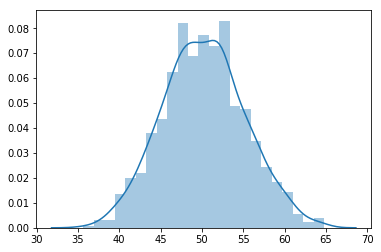

In [14]:
sns.distplot(x)

In [15]:
x_bar = 60

In [16]:
1-stats.norm(mu,sigma).cdf(x_bar)

0.02275013194817921

In [17]:
reps = 10000
bootstrap_samples = np.random.choice(x, (reps,n))

In [18]:
np.mean([len(np.where(x>x_bar)[0])/reps for x in bootstrap_samples])

0.026900200000000003

## Now with non-parametric data

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


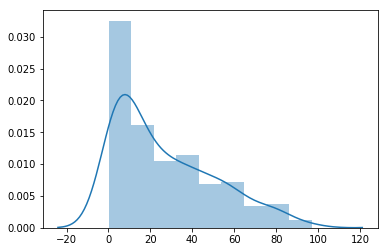

In [29]:
x = np.concatenate([np.random.exponential(15,size=200), np.random.normal(50,20,size=100)])
sns.distplot(x)

In [30]:
x_bar = 80
1-stats.norm(x.mean(),x.std()).cdf(x_bar)

0.012727666814892569

In [31]:
reps = 10000
bootstrap_samples = np.random.choice(x, (reps,n))

In [32]:
np.mean([len(np.where(x>x_bar)[0])/reps for x in bootstrap_samples])

0.0266678

## Bootstrap confidence intervals around mean

In [33]:
bootstrap_mean = bootstrap_samples.mean(axis=0)
l_i, u_i = np.percentile(bootstrap_mean, [2.5, 97.5])
l_i, u_i

(25.453400785909018, 28.40572696074334)

In [34]:
x.mean()-l_i, u_i-x.mean()

(1.4650427744894934, 1.487283400344829)

In [35]:
norm_li, norm_ui = stats.norm.interval(0.95, loc=np.mean(x), scale=np.std(x))
norm_li, norm_ui

(-19.643015681362453, 73.47990280215947)

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


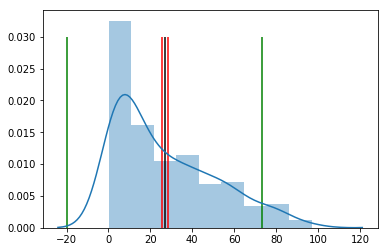

In [36]:
sns.distplot(x)
plt.vlines(x.mean(),0, 0.03)
plt.vlines(l_i, 0, 0.03, colors='r');plt.vlines(u_i, 0, 0.03, colors='r')
plt.vlines(norm_li, 0, 0.03, colors='g');plt.vlines(norm_ui, 0, 0.03, colors='g')

## <center> Jackknife

The bootstrap method is the most widely used resampling method but it isn't the only one. Another resampling method is the jackknife method. The jackknife method generates additional samples by creating multiple copies of the original data, each missing one of the original data points. <br> <br>
For example, say we have [1,2,3,4] as our data. Using the jackknife method, our generated samples would be: [1,2,3], [2,3,4], [1,3,4], and [1,2,4]. 

# <center> Activity

Your task is to first create a <b> jackknife </b> function that will take an array of data and return a list of resampled arrays through the jackknife method. <br><br>
Then, create both a normal and non-normal sample. <br><br>
For each sample, using a normal distribution first and then the resampling distribution:
 - Choose an extreme value and calculate the p-value for it.
 - Calculate the 95% confidence interval around the mean. <br>
 
#### Discuss
What are the advantages and disadvantages for the bootstrap method v.s. jackknife method?

In [27]:
def jackknife(x):
    n = len(x)
    idx = np.arange(n)
    return np.array([x[idx!=i] for i in range(n)])

## Normal Dist

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


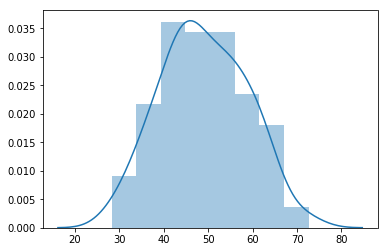

In [88]:
normal_sample = np.random.normal(loc=50, scale=10, size=100)
sns.distplot(normal_sample)

In [89]:
x_bar = 70
normal_p_value = 1-stats.norm(normal_sample.mean(),normal_sample.std()).cdf(x_bar)
normal_p_value

0.013701160200163431

In [90]:
reps = 10000
jackknife_samples = jackknife(normal_sample)

jackknife_p_value = np.mean([len(np.where(i>x_bar)[0])/reps for i in jackknife_samples])
jackknife_p_value

In [92]:
norm_li, norm_ui = stats.norm.interval(0.95, loc=np.mean(normal_sample), scale=np.std(normal_sample))
norm_li, norm_ui

(30.359364040332085, 67.66122159891506)

In [93]:
jackknife_mean = jackknife_samples.mean(axis=0)
j_l_i, j_u_i = np.percentile(jackknife_mean, [2.5, 97.5])
j_l_i, j_u_i

(35.61913808311366, 63.169785664413624)

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


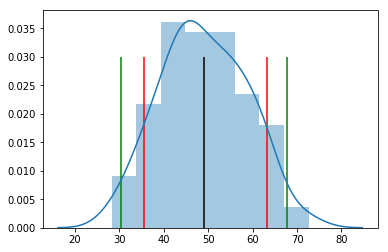

In [94]:
sns.distplot(normal_sample)
plt.vlines(normal_sample.mean(),0, 0.03)
plt.vlines(j_l_i, 0, 0.03, colors='r');plt.vlines(j_u_i, 0, 0.03, colors='r')
plt.vlines(norm_li, 0, 0.03, colors='g');plt.vlines(norm_ui, 0, 0.03, colors='g')

## Non-Normal Dist

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


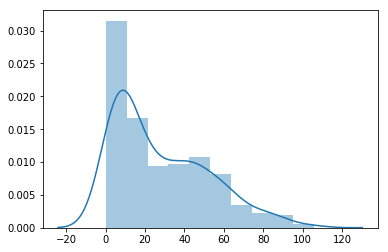

In [95]:
non_normal_sample = np.concatenate([np.random.exponential(15,size=200), np.random.normal(50,20,size=100)])
sns.distplot(non_normal_sample)

In [96]:
x_bar = 100
normal_p_value = 1-stats.norm(non_normal_sample.mean(),non_normal_sample.std()).cdf(x_bar)
normal_p_value

0.0013501223939343943

In [97]:
reps = 10000
jackknife_samples = jackknife(non_normal_sample)

jackknife_p_value = np.mean([len(np.where(i>x_bar)[0])/reps for i in jackknife_samples])
jackknife_p_value

0.00019933333333333334

In [98]:
norm_li, norm_ui = stats.norm.interval(0.95, loc=np.mean(non_normal_sample), scale=np.std(non_normal_sample))
norm_li, norm_ui

(-18.818655772199147, 75.08632560266035)

In [99]:
jackknife_mean = jackknife_samples.mean(axis=0)
j_l_i, j_u_i = np.percentile(jackknife_mean, [2.5, 97.5])
j_l_i, j_u_i

(2.74369517828963, 76.81888321802919)

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


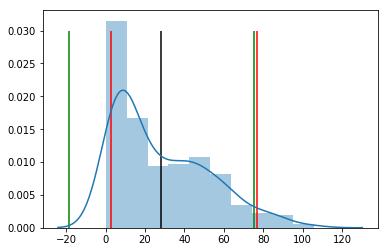

In [100]:
sns.distplot(non_normal_sample)
plt.vlines(non_normal_sample.mean(),0, 0.03)
plt.vlines(j_l_i, 0, 0.03, colors='r');plt.vlines(j_u_i, 0, 0.03, colors='r')
plt.vlines(norm_li, 0, 0.03, colors='g');plt.vlines(norm_ui, 0, 0.03, colors='g')